## Clusterização com KMEANS e DBSCAN

### Usando o DBSCAN para a clusterização

##### Obtendo os dados já tratados do CSV

In [1]:
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed

df = pd.read_csv('../creditcard_treated.csv')

##### Removendo as colunas que não são necessárias

In [7]:
df = df.drop(columns=['Class', 'Amount', 'Time'])

##### Visualizando os dados

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


##### Executando o DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df)

##### Adicionar os clusters ao DataFrame original

In [11]:
df['cluster'] = clusters

##### Visualizando os clusters

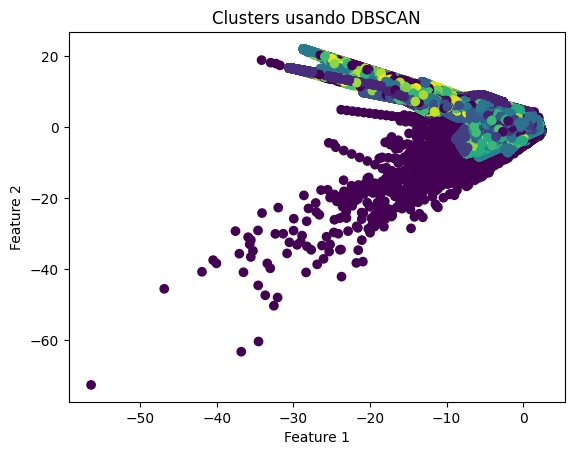

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters usando DBSCAN')
plt.show()

##### Salvando os resultados

In [13]:
df.to_csv('resultado_dbscan.csv', index=False)

#### Usando o KMEANS para a clusterização

In [24]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

In [25]:
# Remover as colunas 'Class', 'Amount', e 'Time'
df = df.drop(columns=['Class', 'Amount', 'Time'])

In [26]:
# Vendo o resultado do tratamento
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [27]:
from sklearn.cluster import KMeans

# Aplicar o algoritmo KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans_clusters = kmeans.fit_predict(df)

In [28]:
# Adicionar os clusters ao DataFrame original
df['kmeans_cluster'] = kmeans_clusters

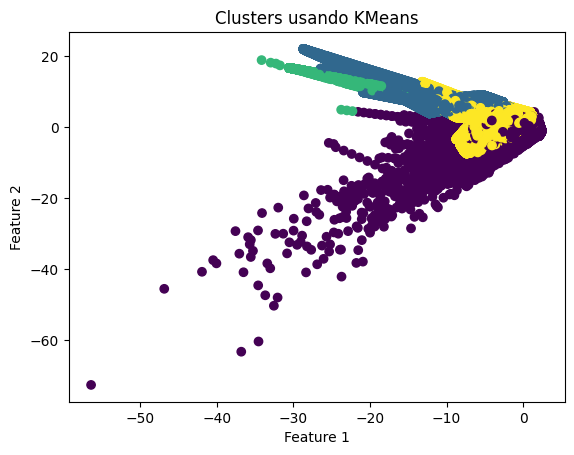

In [29]:
import matplotlib.pyplot as plt

# Visualizar os clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters usando KMeans')
plt.show()

In [30]:
# Salvar os resultados
df.to_csv('resultado_kmeans.csv', index=False)

#### Comparando os dois metodos de clusterização

In [32]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

In [33]:
# Remover as colunas 'Class', 'Amount', e 'Time'
df = df.drop(columns=['Class', 'Amount', 'Time'])

In [34]:
# Vendo o resultado do tratamento
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [35]:
from sklearn.cluster import DBSCAN

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters  = dbscan.fit_predict(df)

In [36]:
from sklearn.cluster import KMeans

# Aplicar o algoritmo KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans_clusters = kmeans.fit_predict(df)

In [37]:
# Adicionar os clusters ao DataFrame original
df['dbscan_cluster'] = dbscan_clusters
df['kmeans_cluster'] = kmeans_clusters

In [39]:
from sklearn.metrics import silhouette_score

# Calcular o silhouette score para cada método
silhouette_dbscan = silhouette_score(df, dbscan_clusters)
silhouette_kmeans = silhouette_score(df, kmeans_clusters)

In [40]:
# Exibir os silhouette scores
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score KMeans: {silhouette_kmeans}")

Silhouette Score DBSCAN: 0.167113174689882
Silhouette Score KMeans: -0.057250074811373335


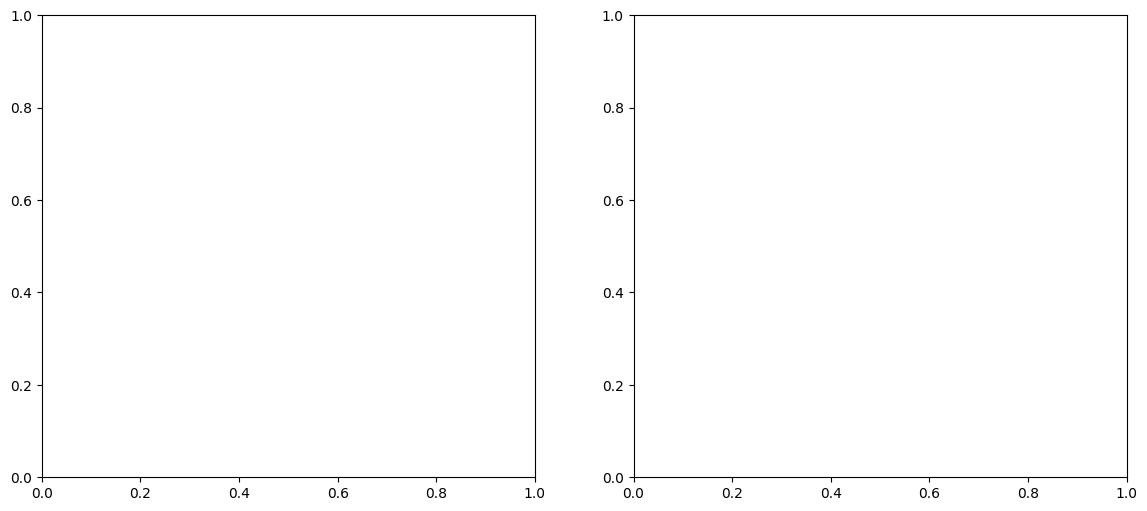

In [55]:
# Visualizar os clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

In [56]:
# DBSCAN
ax[0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['dbscan_cluster'])
ax[0].set_title('Clusters usando DBSCAN')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

Text(4.444444444444452, 0.5, 'Feature 2')

In [57]:
# KMeans
ax[1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'])
ax[1].set_title('Clusters usando KMeans')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

Text(596.2626262626262, 0.5, 'Feature 2')

In [58]:
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

# Normalizar os dados (opcional, mas recomendado para DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame original
df['cluster'] = clusters

# Visualizar os clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters usando DBSCAN')
plt.show()

# Salvar os resultados
df.to_csv('resultado_dbscan.csv', index=False)

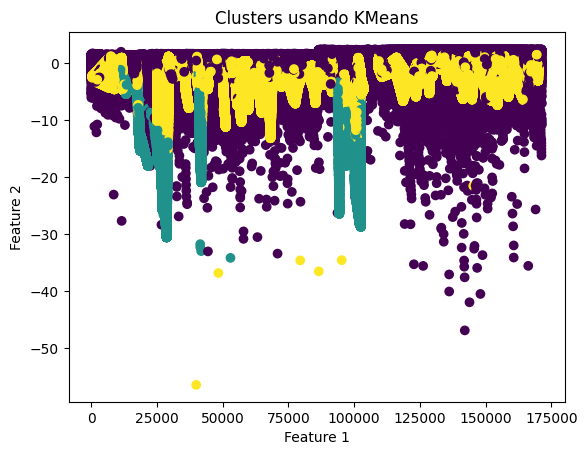

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

# Normalizar os dados (opcional, mas recomendado para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar o algoritmo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame original
df['kmeans_cluster'] = kmeans_clusters

# Visualizar os clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters usando KMeans')
plt.show()

# Salvar os resultados
df.to_csv('resultado_kmeans.csv', index=False)

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

# Normalizar os dados (opcional, mas recomendado para ambos os algoritmos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Aplicar o algoritmo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame original
df['dbscan_cluster'] = dbscan_clusters
df['kmeans_cluster'] = kmeans_clusters

# Calcular o silhouette score para cada método
silhouette_dbscan = silhouette_score(X_scaled, dbscan_clusters)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_clusters)

# Exibir os silhouette scores
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score KMeans: {silhouette_kmeans}")

# Visualizar os clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# DBSCAN
ax[0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['dbscan_cluster'])
ax[0].set_title('Clusters usando DBSCAN')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# KMeans
ax[1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'])
ax[1].set_title('Clusters usando KMeans')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()

# Salvar os resultados
df.to_csv('resultado_comparativo.csv', index=False)


KeyboardInterrupt: 

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,dbscan_cluster,kmeans_cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239370,0.0,-1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.424901,0.0,-1,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.274860,0.0,-1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.121281,0.0,-1,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.120637,0.0,-1,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('../creditcard_treated.csv')

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame original
df['cluster'] = clusters

# Visualizar os clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters usando DBSCAN')
plt.show()

# Salvar os resultados
df.to_csv('resultado_dbscan.csv', index=False)